In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("training_cleaned.csv", skipinitialspace=True, 
                 sep=',')
df.head()

,PurchDate,VehOdo,VNZIP1,WarrantyCost,Auction,Make,Size,IsOnlineSale,TopThreeAmericanName,VNST,Trim,Color,WheelType,Nationality,Transmission,MMR_factor_n,VehBCost_n
0,10/25/2010,61184,33619,533,ADESA,KIA,MEDIUM,0,OTHER,FL,EX,BLUE,Covers,OTHER ASIAN,AUTO,0.228606,0.167169
1,5/27/2009,92383,32124,1630,MANHEIM,DODGE,MEDIUM,0,CHRYSLER,FL,SXT,SILVER,Covers,AMERICAN,AUTO,0.170015,0.109610
2,3/18/2010,45965,74135,693,OTHER,DODGE,MEDIUM,0,CHRYSLER,OK,SE,BLACK,Covers,AMERICAN,AUTO,0.253618,0.205542
3,06/08/2009,80169,85018,1633,OTHER,FORD,VAN,0,FORD,AZ,S,BROWN,Covers,AMERICAN,AUTO,0.163639,0.129481
4,03/04/2009,77372,75236,1623,MANHEIM,CHRYSLER,VAN,0,CHRYSLER,TX,Bas,BLUE,Alloy,AMERICAN,AUTO,0.172436,0.155383


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 17 columns):
PurchDate               58386 non-null object
VehOdo                  58386 non-null int64
VNZIP1                  58386 non-null int64
WarrantyCost            58386 non-null int64
Auction                 58386 non-null object
Make                    58386 non-null object
Size                    58386 non-null object
IsOnlineSale            58386 non-null int64
TopThreeAmericanName    58386 non-null object
VNST                    58386 non-null object
Trim                    58386 non-null object
Color                   58386 non-null object
WheelType               58386 non-null object
Nationality             58386 non-null object
Transmission            58386 non-null object
MMR_factor_n            58386 non-null float64
VehBCost_n              58386 non-null float64
dtypes: float64(2), int64(4), object(11)
memory usage: 7.6+ MB


In [4]:
df.isnull().sum()

PurchDate               0
VehOdo                  0
VNZIP1                  0
WarrantyCost            0
Auction                 0
Make                    0
Size                    0
IsOnlineSale            0
TopThreeAmericanName    0
VNST                    0
Trim                    0
Color                   0
WheelType               0
Nationality             0
Transmission            0
MMR_factor_n            0
VehBCost_n              0
dtype: int64

In [5]:
from pandas.plotting import scatter_matrix

In [6]:
df_num = df.select_dtypes(include=[np.number])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 6 columns):
VehOdo          58386 non-null int64
VNZIP1          58386 non-null int64
WarrantyCost    58386 non-null int64
IsOnlineSale    58386 non-null int64
MMR_factor_n    58386 non-null float64
VehBCost_n      58386 non-null float64
dtypes: float64(2), int64(4)
memory usage: 2.7 MB


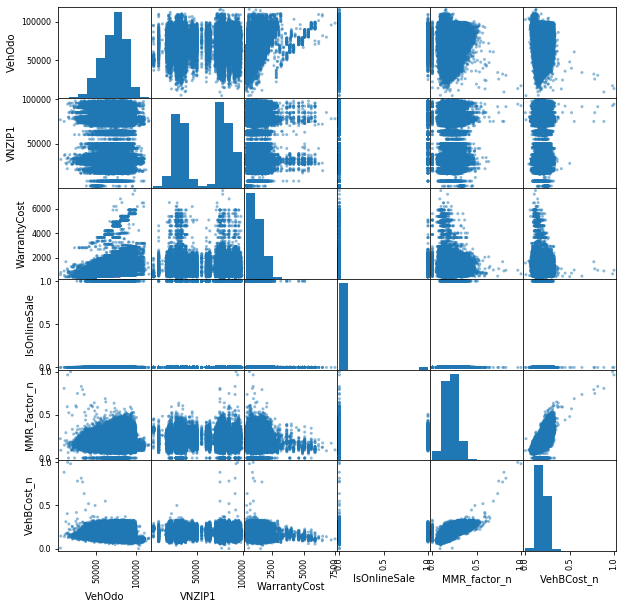

In [7]:
scatter_matrix(df_num, figsize=(10, 10))
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df_num.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
df_num.head().values

array([[6.11840000e+04, 3.36190000e+04, 5.33000000e+02, 0.00000000e+00,
        2.28605834e-01, 1.67169170e-01],
       [9.23830000e+04, 3.21240000e+04, 1.63000000e+03, 0.00000000e+00,
        1.70014937e-01, 1.09609692e-01],
       [4.59650000e+04, 7.41350000e+04, 6.93000000e+02, 0.00000000e+00,
        2.53617514e-01, 2.05542155e-01],
       [8.01690000e+04, 8.50180000e+04, 1.63300000e+03, 0.00000000e+00,
        1.63638637e-01, 1.29481417e-01],
       [7.73720000e+04, 7.52360000e+04, 1.62300000e+03, 0.00000000e+00,
        1.72436484e-01, 1.55383182e-01]])

In [11]:
scaler.transform(df_num.head().values)

array([[-0.63346427, -1.17375281, -1.37838809,  0.        ,  0.84867757,
         0.41777513],
       [ 1.29833365, -1.24020238,  0.81495646,  0.        , -0.75829443,
        -1.33337811],
       [-1.57580321,  0.62709729, -1.05848369,  0.        ,  1.53467269,
         1.5852106 ],
       [ 0.54206006,  1.11082351,  0.82095467,  0.        , -0.93317715,
        -0.72881329],
       [ 0.36887378,  0.6760344 ,  0.80096064,  0.        , -0.69187868,
         0.05920566]])

In [12]:
#scaler.inverse_transform(scaler.transform(df_num.head().values))

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num.values)

In [14]:
X[:5]

array([[0.50823324, 0.31987352, 0.01009096, 0.        , 0.22860583,
        0.16716917],
       [0.78957905, 0.30437487, 0.16600341, 0.        , 0.17001494,
        0.10960969],
       [0.3709916 , 0.73990255, 0.03283115, 0.        , 0.25361751,
        0.20554216],
       [0.67943585, 0.85272652, 0.16642979, 0.        , 0.16363864,
        0.12948142],
       [0.65421311, 0.75131661, 0.16500853, 0.        , 0.17243648,
        0.15538318]])

# DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps=1.05, min_samples=50, metric='manhattan')

In [ ]:
dbscan.fit(X)

In [ ]:
dbscan.labels_[:5]

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
plt.scatter(df_num['WarrantyCost'], df_num['MMR_factor_n'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

In [ ]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
m = DBSCAN(eps=0.05, min_samples=10)
m.fit(X)

In [ ]:
clusters = m.labels_


In [ ]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


In [ ]:
plt.scatter(X[:,5], X[:,4], c=vectorizer(clusters))


In [ ]:
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [ ]:
plt.scatter(df_num.T[0], df_num.T[2], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)